In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale

import warnings 
warnings.filterwarnings('ignore')

def getcsv (filepath):
    df=pd.read_csv(filepath)
    return df

df_p1=getcsv('D:\\Bob Xie\\work\\Dataset\\HK\\2021\\20210425\\NG data\\after processing\\p4.csv')


df_p1['tag']=df_p1['tag'].apply((lambda x: 1 if x==0 else -1))

namelst=[]
for col in df_p1.columns:
    namelst.append(col)        

namelst.remove('产品条码')
namelst.remove('Unnamed: 0')
namelst.remove('Unnamed: 2')
namelst.remove('tag')

df_0=df_p1[df_p1['tag']==1]
df_1=df_p1[df_p1['tag']==-1]

In [19]:
df_temp_train_0=df_0.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_0=df_0.drop(df_temp_train_0.index)
df_temp_test_0=df_0.sample(n=93, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_temp_train_1=df_1.sample(n=1, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_1=df_1.drop(df_temp_train_1.index)
df_temp_test_1=df_1.sample(n=7, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_train=df_temp_train_0.append(df_temp_train_1)
df_test=df_temp_test_0.append(df_temp_test_1)

x_train=df_train[namelst]
y_train=df_train['tag']
x_test=df_test[namelst]
y_test=df_test['tag']

x_train = minmax_scale(x_train)
x_test =  minmax_scale(x_test)

from sklearn.decomposition import PCA

estimator=PCA(n_components = 2)
x_train=estimator.fit_transform(x_train)


print(estimator.explained_variance_ratio_.sum())

x_test=estimator.transform(x_test)

#turn dataframe to array
#x_train=x_train.values
y_train=y_train.values
y_train=y_train.reshape(-1,1)
#x_test=x_test.values
y_test=y_test.values
y_test=y_test.reshape(-1,1)

0.8772722534039623




*** SVDD model training finished ***

iter             = 13
time cost        = 0.9071 s
obj              = -0.5791
pData            = 99.9001 %
nData            = 0.0999 %
nSVs             = 5
radio of nSVs    = 0.4995 %
accuracy         = 99.7003 %
precision        = 99.8999 %
recall           = 99.8000 %
F1 score         = 99.8499 %




*** SVDD model test finished ***

time cost        = 0.0040 s
accuracy         = 87.0000 %
precision        = 92.5532 %
recall           = 93.5484 %
F1 score         = 93.0481 %


*** confusion matrix for test ***


[[87  6]
 [ 7  0]]




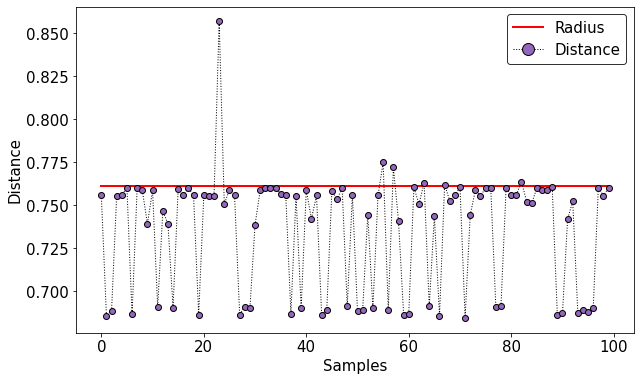

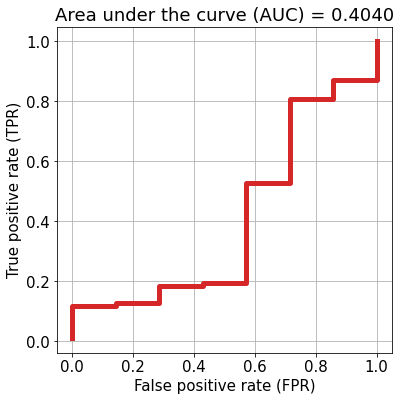



*** SVDD model training finished ***

iter             = 14
time cost        = 0.9575 s
obj              = -19.0003
pData            = 99.9001 %
nData            = 0.0999 %
nSVs             = 3
radio of nSVs    = 0.2997 %
accuracy         = 99.8002 %
precision        = 99.9000 %
recall           = 99.9000 %
F1 score         = 99.9000 %




*** SVDD model test finished ***

time cost        = 0.0030 s
accuracy         = 88.0000 %
precision        = 92.6316 %
recall           = 94.6237 %
F1 score         = 93.6170 %


*** confusion matrix for test ***


[[88  5]
 [ 7  0]]




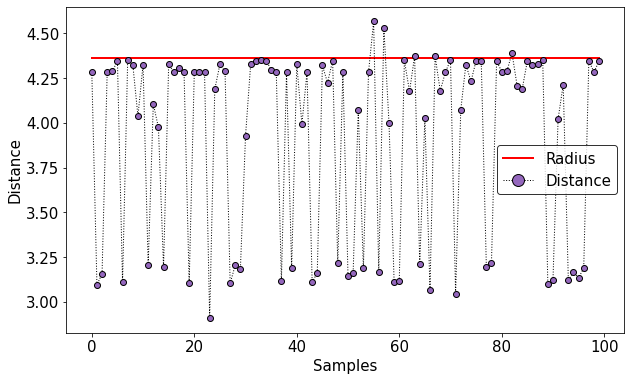

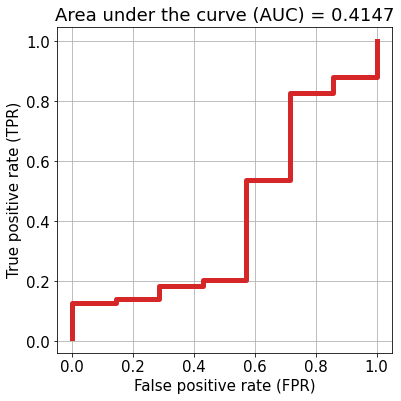



*** SVDD model training finished ***

iter             = 17
time cost        = 1.1091 s
obj              = -74.0082
pData            = 99.9001 %
nData            = 0.0999 %
nSVs             = 4
radio of nSVs    = 0.3996 %
accuracy         = 99.9001 %
precision        = 99.9001 %
recall           = 100.0000 %
F1 score         = 99.9500 %




*** SVDD model test finished ***

time cost        = 0.0060 s
accuracy         = 87.0000 %
precision        = 92.5532 %
recall           = 93.5484 %
F1 score         = 93.0481 %


*** confusion matrix for test ***


[[87  6]
 [ 7  0]]




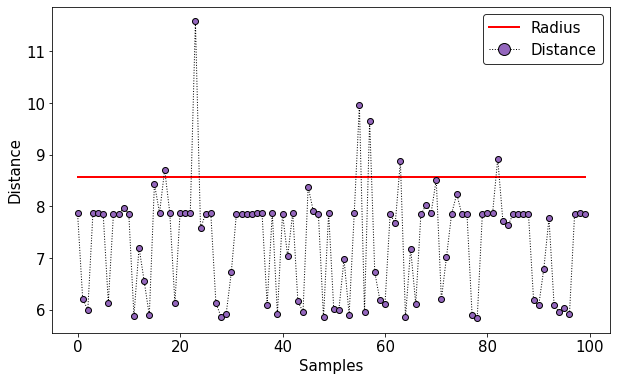

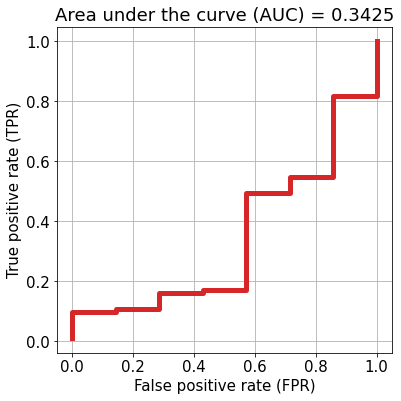



*** SVDD model training finished ***

iter             = 14
time cost        = 0.9705 s
obj              = -0.0019
pData            = 99.9001 %
nData            = 0.0999 %
nSVs             = 93
radio of nSVs    = 9.2907 %
accuracy         = 97.1029 %
precision        = 99.8972 %
recall           = 97.2000 %
F1 score         = 98.5302 %




*** SVDD model test finished ***

time cost        = 0.0030 s
accuracy         = 77.0000 %
precision        = 93.7500 %
recall           = 80.6452 %
F1 score         = 86.7052 %


*** confusion matrix for test ***


[[75 18]
 [ 5  2]]




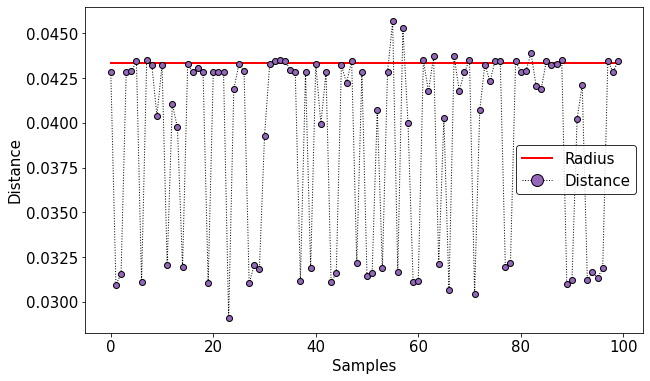

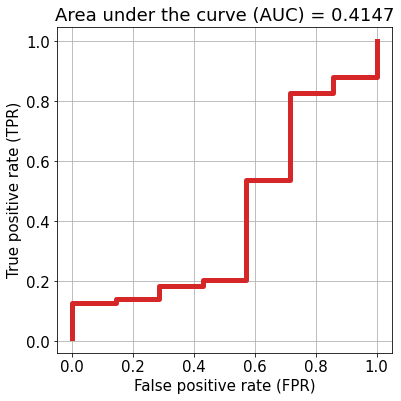



*** SVDD model training finished ***

iter             = 20
time cost        = 1.3384 s
obj              = -0.3936
pData            = 99.9001 %
nData            = 0.0999 %
nSVs             = 423
radio of nSVs    = 42.2577 %
accuracy         = 0.0000 %
precision        = 0.0000 %
recall           = 0.0000 %
F1 score         = 0.0000 %




*** SVDD model test finished ***

time cost        = 0.0040 s
accuracy         = 7.0000 %
precision        = 0.0000 %
recall           = 0.0000 %
F1 score         = 0.0000 %


*** confusion matrix for test ***


[[ 0 93]
 [ 0  7]]




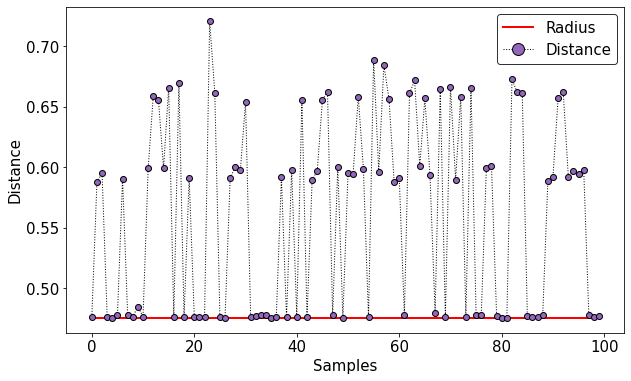

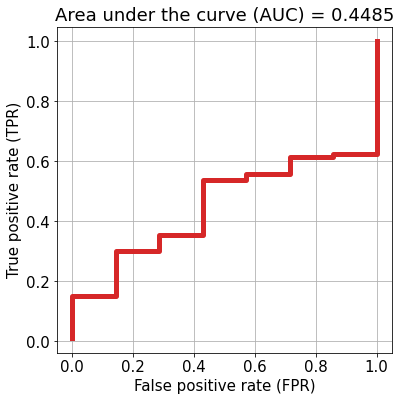

In [22]:
import sys
sys.path.append(r"D:\Python Package\SVDD\SVDD-master")
from src.svdd import SVDD
from src.visualize import Visualization as draw
from sklearn.metrics import confusion_matrix


# kernel list

#kernelList = {"1": {"type": 'ploy', "degree": 2, "offset": 0},}


kernelList = {"1": {"type": 'gauss', "width": 1/24},
              "2": {"type": 'linear', "offset": 0},
              "3": {"type": 'ploy', "degree": 2, "offset": 0},
              "4": {"type": 'tanh', "gamma": 1e-4, "offset": 0},
              "5": {"type": 'lapl', "width": 1/12}
              }


for i in range(len(kernelList)):

    # set SVDD parameters
    parameters = {"positive penalty": 0.9,
                  "negative penalty": 0.8,
                  "kernel": kernelList.get(str(i+1)),
                  "option": {"display": 'on'}}
    
    # construct an SVDD model
    svdd = SVDD(parameters)
    
    # train SVDD model
    svdd.train(x_train, y_train)
      
    # test SVDD model
    distance, accuracy, y_test_pred = svdd.test(x_test, y_test)
    
    # print confusion_matrix
    print("*** confusion matrix for test ***")
    print('\n')
    print(confusion_matrix(y_test,y_test_pred,labels=[1,-1]))
    print('\n')
    
    # visualize the results
    draw.testResult(svdd, distance)
    draw.testROC(y_test, distance)
    #draw.boundary(svdd, x_train, y_train)